In [6]:
import cv2
from ultralytics import YOLO
def detectar_camaras():
    index = 0
    arr = []
    while True:
        cap = cv2.VideoCapture(index)
        if not cap.read()[0]:
            break
        else:
            arr.append(index)
        cap.release()
        index += 1
    return arr

# Uso de la función
camaras_disponibles = detectar_camaras()
print("Cámaras disponibles:", camaras_disponibles)

Cámaras disponibles: [0]


In [7]:

# Instancia del modelo YOLO con los pesos especificados
pesos_yolo = "yolov8n.pt" # Usamos la ruta relativa
model = YOLO(pesos_yolo)

# Verificar si la cámara está disponible
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("No se pudo acceder a la cámara.")
else:
    try:
        # Realiza la detección de objetos en el flujo de video de la cámara del computador
        results = model(source=0, show=True, conf=0.3, save=True)
    except Exception as e:
        print("Ocurrió un error al realizar la detección de objetos:", e)
    finally:
        cap.release()


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 111.8ms
0: 480x640 1 person, 54.5ms
0: 480x640 1 person, 59.5ms
0: 480x640 1 person, 53.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 57.3ms
0: 480x640 1 person, 55.1ms
0: 480x640 1 person, 60.9ms
0: 480x640 1 person, 56.1ms
0: 480x640 1 person, 54.6ms
0: 480x640 1 person, 58.8ms
0: 480x640 1 person, 54.3ms
0: 480x640 1 person, 57.0ms
0: 480x640 1 person, 67.3ms


KeyboardInterrupt: 

In [ ]:
# Tracking
from ultralytics import YOLO
# Configure the tracking parameters and run the tracker
model = YOLO('yolov8n.pt')
# Seleccionamos la clase 66 (keyboard)
results = model.track(source="0", conf=0.3, iou=0.5, show=True, classes=[66])

KeyboardInterrupt: 

In [ ]:
!rm -rf datasets\\train\\images
!rm -rf datasets\\valid\\images
!rm -rf datasets\\test\\images
!rm -rf datasets
!rm -rf Dice.v2-medium-color.yolov8
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from sklearn.model_selection import train_test_split
import shutil
import os
import zipfile

dataset_ZIP_path = "datasets.zip"

dataset_path = dataset_ZIP_path[:-4]
if not os.path.exists(dataset_path):
    # Create a directory to store the dataset
    os.makedirs(dataset_path)
    # Unzip the dataset in the created directory

    with zipfile.ZipFile(dataset_ZIP_path, "r") as zip_ref:
        zip_ref.extractall(".")

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:

import zipfile
import os
from ultralytics import YOLO
# import torch
# Load a model
model = YOLO("yolov8n.pt")


# Train the model
train_results = model.train(
    data=dataset_ZIP_path[:-4] + "/config.yaml",  # path to dataset YAML
    epochs=50,  # number of training epochs
    imgsz=640,  # training image size
)

# Evaluate model performance on the validation set
metrics = model.val()



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, h

100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.6MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/labels/train... 538 images, 0 backgrounds, 0 corrupt: 100%|██████████| 538/538 [00:01<00:00, 378.84it/s]


train: New cache created: /content/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/labels/val... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<00:00, 274.18it/s]

val: New cache created: /content/datasets/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.29G      2.065      4.934      1.173         76        640: 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        180        432    0.00201      0.209     0.0266    0.00981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.45G      1.505      3.261      0.949         60        640: 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        180        432    0.00694      0.616      0.116     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.61G      1.447      2.967     0.9315         78        640: 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        180        432      0.184     0.0755      0.184        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.61G      1.345      2.641     0.9139         99        640: 100%|██████████| 34/34 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        180        432      0.223      0.353      0.237       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.61G      1.285      2.512     0.9104         49        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]


                   all        180        432      0.259      0.464      0.309      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.61G      1.272      2.323     0.9018         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]


                   all        180        432      0.334      0.466      0.372      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.78G      1.237      2.143     0.9014         84        640: 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]


                   all        180        432      0.385      0.488      0.409      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.78G      1.179      2.021     0.8962         78        640: 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]


                   all        180        432      0.433      0.549      0.466      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.78G      1.151      1.963     0.8791         22        640: 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        180        432       0.43      0.523      0.504      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.78G      1.139      1.846     0.8956         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        180        432      0.449      0.581      0.522      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.78G      1.113      1.685     0.8845         33        640: 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        180        432      0.557      0.544      0.594      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.78G      1.137      1.638     0.8787         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        180        432      0.598      0.574      0.625      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.78G      1.073       1.46     0.8798         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        180        432      0.583      0.648      0.639      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.78G       1.06       1.35     0.8708         32        640: 100%|██████████| 34/34 [00:08<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        180        432      0.608      0.648      0.707      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.78G      1.027      1.358     0.8659         48        640: 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        180        432      0.655      0.623      0.701      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.96G      1.033       1.31     0.8671         38        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        180        432      0.657       0.64      0.721      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.96G      1.026      1.266     0.8695         61        640: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]


                   all        180        432        0.6      0.675      0.714        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.96G      1.025      1.193     0.8772         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]


                   all        180        432      0.686      0.663      0.743      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.96G      1.002      1.165     0.8683         47        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        180        432      0.705      0.643      0.743       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.96G     0.9462      1.143     0.8477         27        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        180        432      0.744      0.579      0.735      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.15G       0.98      1.128     0.8607         57        640: 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.58it/s]


                   all        180        432      0.732      0.641       0.77      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.15G     0.9762      1.048      0.856         29        640: 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        180        432      0.684      0.693      0.775      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.15G     0.9706      1.029     0.8512         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]

                   all        180        432      0.718      0.732      0.819      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.34G      1.002      1.073     0.8599         19        640: 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]


                   all        180        432      0.726      0.732      0.806      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.34G     0.9654     0.9764     0.8606         83        640: 100%|██████████| 34/34 [00:09<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        180        432      0.829      0.709      0.855      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.34G     0.9345     0.9332     0.8464         28        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        180        432      0.783      0.736      0.849      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.34G     0.9045     0.8891     0.8543         25        640: 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        180        432      0.805      0.785      0.877      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.34G     0.9155     0.8988     0.8497         64        640: 100%|██████████| 34/34 [00:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        180        432      0.838       0.77      0.888      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.34G     0.9244     0.8756     0.8494         33        640: 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        180        432      0.794      0.791      0.877      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.34G     0.8985     0.8655     0.8395         38        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]


                   all        180        432      0.843      0.742      0.883      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.34G     0.8871     0.8293     0.8468         75        640: 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        180        432      0.851      0.701      0.882      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.34G     0.8995     0.8388     0.8488         84        640: 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]

                   all        180        432      0.809      0.738      0.854      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.34G     0.8983     0.8385     0.8439         20        640: 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        180        432      0.851      0.747      0.888       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.34G     0.8586     0.8167     0.8339         26        640: 100%|██████████| 34/34 [00:09<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        180        432      0.858       0.76        0.9      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.34G     0.8452     0.8039     0.8423         30        640: 100%|██████████| 34/34 [00:09<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        180        432      0.851      0.815      0.911      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.34G     0.8219      0.789     0.8443         63        640: 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        180        432      0.876      0.775      0.904      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.34G     0.8533     0.8111     0.8431         74        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        180        432      0.813      0.789      0.887      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.34G      0.838     0.7895     0.8342         69        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

                   all        180        432      0.861      0.793      0.916      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.34G     0.8365     0.7399     0.8404         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        180        432      0.903      0.762       0.92      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.34G     0.7862     0.6984     0.8341         61        640: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        180        432      0.869      0.793      0.913      0.687


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.34G     0.7871     0.7188     0.8237         15        640: 100%|██████████| 34/34 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]


                   all        180        432      0.884       0.78      0.911      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.34G     0.7834       0.69     0.8291         33        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        180        432       0.89      0.803      0.912      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.34G     0.7857     0.7073     0.8364         18        640: 100%|██████████| 34/34 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        180        432      0.872      0.815      0.926      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.34G      0.733     0.6559     0.8186         15        640: 100%|██████████| 34/34 [00:08<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        180        432      0.892      0.855      0.949      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.34G     0.7646     0.6578      0.822         16        640: 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        180        432      0.846       0.86       0.93      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.34G     0.7482     0.6529     0.8212         18        640: 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        180        432      0.859      0.853      0.928      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.34G     0.7315     0.6334      0.819         14        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]


                   all        180        432      0.861      0.853      0.928      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.34G     0.7358     0.6284     0.8145         14        640: 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        180        432      0.902      0.831      0.938       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.34G     0.7395     0.6203      0.817         14        640: 100%|██████████| 34/34 [00:09<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        180        432      0.893      0.847      0.947      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.34G     0.7162     0.6142     0.8152         14        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]

                   all        180        432      0.903      0.844      0.949      0.717



50 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


                   all        180        432      0.903      0.844      0.949      0.716
                     1         50         67      0.972      0.776      0.943      0.773
                     2         47         63      0.988       0.81      0.961      0.701
                     3         38         75      0.874       0.88      0.952      0.726
                     4         60         79      0.918      0.848      0.958      0.714
                     5         42         48      0.827      0.798      0.909      0.668
                     6         43        100      0.838       0.95      0.968      0.715
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/labels/val.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]


                   all        180        432      0.903      0.844      0.947      0.722
                     1         50         67      0.972      0.776      0.943      0.773
                     2         47         63      0.988       0.81      0.962       0.71
                     3         38         75      0.874       0.88      0.952      0.738
                     4         60         79      0.918      0.848      0.947      0.718
                     5         42         48      0.828        0.8      0.908      0.679
                     6         43        100      0.838       0.95      0.968      0.715
Speed: 3.9ms preprocess, 4.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/prueba/OIP.jpeg: 640x640 (no detections), 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


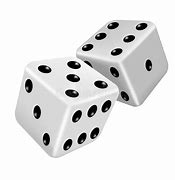


image 1/1 /content/prueba/OIP (2).jpeg: 640x640 1 1, 8.2ms
Speed: 4.7ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


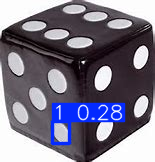


image 1/1 /content/prueba/OIP (1).jpeg: 640x640 (no detections), 9.0ms
Speed: 3.7ms preprocess, 9.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


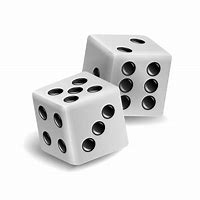

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 243.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 185.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 194.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimm

In [4]:
def detectObject(path_to_image: str):
    # Perform object detection on an image
    if not os.path.exists(path_to_image):
        print("La imagen no existe.")
        return
    results = model(path_to_image)
    results[0].show()
    return results

for img in os.listdir("prueba/"):
    if not img.endswith(('.png', '.jpg', '.jpeg')):
        continue
    detectObject("prueba/" + img)

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model